In [177]:
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
stats=pd.read_csv(r"datasets/player_mvp_stats_adv.csv")
del stats['Unnamed: 0']
stats22_24=pd.read_csv(r"stats_2024.csv")
del stats22_24['Unnamed: 0']

In [179]:
stats=pd.concat([stats,stats22_24],ignore_index=True)

In [180]:
predictors=['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
        '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
        'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
        'W', 'L', 'W/L%', 'GB', 'PS/G',
        'PA/G', 'SRS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
        'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
        'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

In [181]:
train=stats[stats['Year']<2024]
test=stats[stats['Year']==2024]

In [182]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [183]:
reg.fit(train[predictors], train["Share"])

Ridge(alpha=0.1)

In [184]:
preds=reg.predict(test[predictors])

In [185]:
preds=pd.DataFrame(preds,columns=['predictions'], index=test.index)

In [186]:
pd.set_option('display.max_rows', 15)
preds

,predictions
14131,0.010700
14132,0.003517
14133,-0.000277
14134,-0.016613
14135,-0.025930
...,...
15803,-0.009421
15804,-0.003335
15805,-0.008603
15806,0.007627


In [187]:
combo=pd.concat([test[["Player","Share"]], preds], axis=1)

In [188]:
combo

,Player,Share,predictions
14131,AJ Griffin,0.0,0.010700
14132,Bogdan Bogdanović,0.0,0.003517
14133,Bruno Fernando,0.0,-0.000277
14134,Clint Capela,0.0,-0.016613
14135,De'Andre Hunter,0.0,-0.025930
...,...,...,...
15803,Marvin Bagley III,0.0,-0.009421
15804,Patrick Baldwin Jr,0.0,-0.003335
15805,Richaun Holmes,0.0,-0.008603
15806,Tristan Vukcevic,0.0,0.007627


In [189]:
combo.sort_values("Share", ascending=False).head(10)

,Player,Share,predictions
14541,Nikola Jokić,0.935,0.255667
15274,Shai Gilgeous-Alexander,0.646,0.155579
14485,Luka Dončić,0.572,0.205676
15045,Giannis Antetokounmpo,0.194,0.230775
15204,Jalen Brunson,0.143,0.119055
14195,Jayson Tatum,0.087,0.102609
15091,Anthony Edwards,0.018,0.073431
15553,Domantas Sabonis,0.003,0.143784
15438,Kevin Durant,0.001,0.091578
15263,Isaiah Joe,0.000,0.004789


In [190]:
combo=combo.sort_values('Share',ascending=False)
combo['Rk']=list(range(1,combo.shape[0]+1))

In [191]:
combo.head(10)

,Player,Share,predictions,Rk
14541,Nikola Jokić,0.935,0.255667,1
15274,Shai Gilgeous-Alexander,0.646,0.155579,2
14485,Luka Dončić,0.572,0.205676,3
15045,Giannis Antetokounmpo,0.194,0.230775,4
15204,Jalen Brunson,0.143,0.119055,5
14195,Jayson Tatum,0.087,0.102609,6
15091,Anthony Edwards,0.018,0.073431,7
15553,Domantas Sabonis,0.003,0.143784,8
15438,Kevin Durant,0.001,0.091578,9
15263,Isaiah Joe,0.000,0.004789,10


In [192]:
combo=combo.sort_values('predictions', ascending=False)
combo['Predicted_Rk']=list(range(1,combo.shape[0]+1))

In [193]:
combo.head(10)

,Player,Share,predictions,Rk,Predicted_Rk
14541,Nikola Jokić,0.935,0.255667,1,1
15045,Giannis Antetokounmpo,0.194,0.230775,4,2
14485,Luka Dončić,0.572,0.205676,3,3
15274,Shai Gilgeous-Alexander,0.646,0.155579,2,4
15553,Domantas Sabonis,0.003,0.143784,8,5
14870,LeBron James,0.000,0.121944,477,6
15204,Jalen Brunson,0.143,0.119055,5,7
14858,Anthony Davis,0.000,0.108436,439,8
15376,Joel Embiid,0.000,0.102751,45,9
14195,Jayson Tatum,0.087,0.102609,6,10


In [194]:
combo.sort_values("Share",ascending=False).head(10)

,Player,Share,predictions,Rk,Predicted_Rk
14541,Nikola Jokić,0.935,0.255667,1,1
15274,Shai Gilgeous-Alexander,0.646,0.155579,2,4
14485,Luka Dončić,0.572,0.205676,3,3
15045,Giannis Antetokounmpo,0.194,0.230775,4,2
15204,Jalen Brunson,0.143,0.119055,5,7
14195,Jayson Tatum,0.087,0.102609,6,10
15091,Anthony Edwards,0.018,0.073431,7,16
15553,Domantas Sabonis,0.003,0.143784,8,5
15438,Kevin Durant,0.001,0.091578,9,11
14751,Ben Sheppard,0.000,-0.007204,547,387


In [195]:
def find_ap(combo:pd.DataFrame):
    """find_ap

    Args:
        combo (pd.DataFrame): 

    Returns:
        float: 
    """
    actual=combo.sort_values("Share", ascending=False).head(5)
    predicted=combo.sort_values("predictions", ascending=False)
    ps=[]
    found=0
    seen=1
    for i,r in predicted.iterrows():
        if r['Player'] in actual['Player'].values:
            found+=1
            ps.append(found/seen)
        seen+=1
        
    return sum(ps)/len(ps)

In [196]:
find_ap(combo=combo)

0.9428571428571428

# For 2024, we predicted 94.3% of the Top-5 MVP Finishers correctly

In [197]:
predictors

['Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Year',
 'W',
 'L',
 'W/L%',
 'GB',
 'PS/G',
 'PA/G',
 'SRS',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [198]:
years=list(range(1991,2025))

In [199]:
aps=[]
all_preds=[]
for year in years[5:]:
    train=stats[stats["Year"]<year]
    test=stats[stats["Year"]==year]
    reg.fit(train[predictors],train["Share"])
    preds=reg.predict(test[predictors])
    preds=pd.DataFrame(preds,columns=['predictions'],index=test.index)
    combo=pd.concat([test[["Player","Share"]],preds],axis=1)
    all_preds.append(combo)
    aps.append(find_ap(combo))


In [200]:
sum(aps)/len(aps)

0.7842064667303726

In [201]:
def add_ranks(combo:pd.DataFrame)->pd.DataFrame:
    combo=combo.sort_values('Share',ascending=False)
    combo['Rk']=list(range(1,combo.shape[0]+1))
    combo=combo.sort_values('predictions', ascending=False)
    combo['Predicted_Rk']=list(range(1,combo.shape[0]+1))
    combo['Diff']=combo["Rk"]-combo['Predicted_Rk']
    return combo

In [202]:
ranking=add_ranks(all_preds[1])
ranking[ranking['Rk']<6].sort_values('Diff', ascending=False)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
1670,Michael Jordan,0.832,0.254972,2,1,1
3610,Grant Hill,0.327,0.218286,3,3,0
13135,Karl Malone,0.857,0.247365,1,2,-1
6833,Tim Hardaway,0.207,0.122020,4,8,-4
1377,Glen Rice,0.117,0.025898,5,64,-59


In [203]:
def backtest(stats, model, years, predictors):
    aps=[]
    all_preds=[]
    for year in years[5:]:
        train=stats[stats["Year"]<year]
        test=stats[stats["Year"]==year]
        model.fit(train[predictors],train["Share"])
        preds=reg.predict(test[predictors])
        preds=pd.DataFrame(preds,columns=['predictions'],index=test.index)
        combo=pd.concat([test[["Player","Share"]],preds],axis=1)
        combo=add_ranks(combo)
        all_preds.append(combo)
        aps.append(find_ap(combo))
    return sum(aps)/len(aps),aps,pd.concat(all_preds)

In [204]:
mean_ap,aps,all_preds=backtest(stats,reg, years[5:], predictors)

In [205]:
mean_ap

0.8012150815825096

In [206]:
all_preds[all_preds['Rk']<=5].sort_values("Diff").head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
10697,Steve Nash,0.839,0.033186,1,53,-52
11606,Peja Stojaković,0.228,0.031658,4,52,-48
10715,Steve Nash,0.739,0.051923,1,38,-37
8345,Jason Kidd,0.712,0.048377,2,33,-31
10730,Steve Nash,0.785,0.074515,2,21,-19
3744,Chauncey Billups,0.344,0.079492,5,22,-17
4439,Stephen Curry,0.173,0.073753,5,21,-16
12212,Tony Parker,0.274,0.059673,5,21,-16
10935,Chris Paul,0.138,0.056352,5,20,-15
15396,Devin Booker,0.216,0.073048,4,16,-12


# Algorithm is undervalueing point guards

In [207]:
pd.set_option('display.max_rows', None)
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

,0,1
13,0.159391,eFG%
29,0.071013,W/L%
18,0.029933,DRB
53,0.025721,VORP
15,0.023582,FTA
16,0.020297,FT%
49,0.017533,WS/48
5,0.014872,FGA
23,0.013517,TOV
17,0.010830,ORB


In [208]:
predictors

['Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Year',
 'W',
 'L',
 'W/L%',
 'GB',
 'PS/G',
 'PA/G',
 'SRS',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [209]:
stat_ratios=stats[["PTS","AST","TRB", "STL","BLK","3P","WS","WS/48", "eFG%", "VORP","BPM",'PER',"Year"]].groupby("Year").apply(lambda x: x/x.mean())

C:\Users\zac15\AppData\Local\Temp\ipykernel_4464\1253354308.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stat_ratios=stats[["PTS","AST","TRB", "STL","BLK","3P","WS","WS/48", "eFG%", "VORP","BPM",'PER',"Year"]].groupby("Year").apply(lambda x: x/x.mean())


In [210]:
stat_ratios.index=stat_ratios.index.droplevel()

In [211]:
pd.set_option('display.max_rows', 20)
stat_ratios

,PTS,AST,TRB,STL,BLK,3P,WS,WS/48,eFG%,VORP,BPM,PER,Year
0,1.692601,2.010078,0.866690,2.608773,1.346939,5.594452,2.166399,1.468403,1.024506,3.728119,-1.296067,1.220476,1.0
1,2.884104,1.542618,2.437566,2.059558,1.795918,5.085865,3.920150,2.240580,1.060943,7.743017,-3.342488,1.770444,1.0
2,0.679268,0.327222,0.622934,0.549215,0.673469,0.000000,0.653358,1.000033,1.054513,-0.143389,1.637137,0.934192,1.0
3,0.055678,0.000000,0.135420,0.000000,0.673469,0.000000,0.000000,1.443085,0.000000,0.000000,3.547130,0.655441,1.0
4,1.514433,1.262142,0.541681,0.823823,0.224490,1.017173,1.375491,1.291182,1.005216,0.716946,0.613926,1.235544,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15803,1.389012,0.549616,1.838084,0.676523,1.737847,0.212560,1.222609,1.612161,1.155861,0.762921,0.229236,1.508906,1.0
15804,0.522364,0.399720,0.948689,0.845653,0.993056,0.850242,0.090564,0.251074,0.931271,-0.572191,2.636209,0.754453,1.0
15805,0.593595,0.299790,1.363740,0.507392,1.241319,0.000000,0.588664,1.506446,1.086161,-0.381460,1.891193,1.127791,1.0
15806,1.009111,0.649546,1.067275,0.845653,1.737847,1.062802,0.045282,0.594650,0.981610,-0.190730,2.063120,1.081124,1.0


In [212]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS', 'T_MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [213]:
stats_copy=stats.copy()
stats_copy[
    ['PTS_R',
 'AST_R',
 'TRB_R',
 'STL_R',
 'BLK_R',
 '3P_R',
 'WS_R',
 'WS/48_R',
 'eFG%_R',
 'VORP_R',
 'BPM_R',
 'PER_R']
    ]=stat_ratios[
    ["PTS","AST","TRB", "STL","BLK","3P","WS","WS/48", "eFG%", "VORP","BPM",'PER']]

In [214]:
stats_copy.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS', 'T_MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'PTS_R', 'AST_R', 'TRB_R',
       'STL_R', 'BLK_R', '3P_R', 'WS_R', 'WS/48_R', 'eFG%_R', 'VORP_R',
       'BPM_R', 'PER_R'],
      dtype='object')

In [215]:
stats_copy= stats_copy[
    (stats['PTS'] > 0) &  # Players who scored at least some points
    (stats['G'] >= 10) &  # Players who played in at least 10 games
    (stats['MP'] >= 20)  # Players with meaningful playing time
    
]

In [216]:
#stats[["PTS_R","AST_R","STL_R","BLK_R","3P_R","VORP_R"]]=stat_ratios[["PTS","AST","STL","BLK","3P","VORP"]]

In [217]:
stats_copy.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS', 'T_MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'PTS_R', 'AST_R', 'TRB_R',
       'STL_R', 'BLK_R', '3P_R', 'WS_R', 'WS/48_R', 'eFG%_R', 'VORP_R',
       'BPM_R', 'PER_R'],
      dtype='object')

In [218]:
test_predictors=predictors+['PTS_R',
 'AST_R',
 'TRB_R',
 'STL_R',
 'BLK_R',
 '3P_R',
 'WS_R',
 'WS/48_R',
 'eFG%_R',
 'VORP_R',
 'BPM_R',
 'PER_R']

In [219]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS', 'T_MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [220]:
mean_ap,aps,all_preds=backtest(stats_copy,reg, years[5:], test_predictors)

In [221]:
mean_ap

0.8217302526877335

In [222]:
all_preds[all_preds['Rk']<=5].sort_values("Diff").head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
10697,Steve Nash,0.839,0.039903,1,37,-36
8345,Jason Kidd,0.712,0.026865,2,36,-34
10715,Steve Nash,0.739,0.082627,1,21,-20
10935,Chris Paul,0.138,0.072570,5,23,-18
1923,Joakim Noah,0.258,0.102380,4,18,-14
12212,Tony Parker,0.274,0.101759,5,18,-13
11606,Peja Stojaković,0.228,0.074585,4,17,-13
3744,Chauncey Billups,0.344,0.104754,5,15,-10
6241,Kobe Bryant,0.291,0.116830,4,14,-10
15396,Devin Booker,0.216,0.107310,4,13,-9


In [223]:
f_stats=stats_copy.copy()#filtered stats

In [224]:
p_test=['Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'W',
 'L',
 'W/L%',
 'GB',
 'PS/G',
 'PA/G',
 'SRS',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'PTS_R',
 'AST_R',
 'TRB_R',
 'STL_R',
 'BLK_R',
 '3P_R',
 'WS_R',
 'WS/48_R',
 'eFG%_R',
 'VORP_R',
 'BPM_R',
 'PER_R']

In [225]:
train=f_stats[f_stats['Year']<2024]
test=f_stats[f_stats['Year']==2024]
test=test[
    (test['PTS'] > 15) &  # Players who scored at least some points
    (test['G'] >= 65) &  # Players who played in at least 10 games
    (test['MP'] >= 20) # Players with meaningful playing time
]

In [226]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train[test_predictors]=scaler.fit_transform(train[test_predictors])
test[test_predictors]=scaler.transform(test[test_predictors])
normalized_stats=f_stats.copy()
normalized_stats[p_test]=scaler.fit_transform(normalized_stats[p_test])

C:\Users\zac15\AppData\Local\Temp\ipykernel_4464\2298198329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[test_predictors]=scaler.fit_transform(train[test_predictors])


In [227]:
mean_ap,aps,all_preds=backtest(normalized_stats,reg, years[5:], [t for t in test_predictors if t !='Year'])

In [228]:
mean_ap

0.8349180533755343

In [229]:
#mean top 5 accuracy is 83.5%

In [230]:
all_preds[all_preds['Rk']<=5].sort_values("Diff").head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
10697,Steve Nash,0.839,0.035409,1,40,-39
8345,Jason Kidd,0.712,0.020904,2,39,-37
10715,Steve Nash,0.739,0.083617,1,21,-20
10935,Chris Paul,0.138,0.072958,5,23,-18
11606,Peja Stojaković,0.228,0.071918,4,20,-16
1923,Joakim Noah,0.258,0.099521,4,18,-14
12212,Tony Parker,0.274,0.100636,5,17,-12
3744,Chauncey Billups,0.344,0.103930,5,15,-10
15396,Devin Booker,0.216,0.103113,4,13,-9
9152,Carmelo Anthony,0.393,0.103860,3,11,-8


In [231]:
reg.fit(train[test_predictors],train["Share"])
preds=reg.predict(test[test_predictors])


In [232]:
preds=pd.DataFrame(preds,columns=['predictions'], index=test.index)
combo=pd.concat([test[["Player","Share"]], preds], axis=1)
combo.sort_values("Share", ascending=False).head(10)

,Player,Share,predictions
14541,Nikola Jokić,0.935,0.362933
15274,Shai Gilgeous-Alexander,0.646,0.240640
14485,Luka Dončić,0.572,0.306866
15045,Giannis Antetokounmpo,0.194,0.340328
15204,Jalen Brunson,0.143,0.179477
14195,Jayson Tatum,0.087,0.156183
15091,Anthony Edwards,0.018,0.102906
15553,Domantas Sabonis,0.003,0.173728
15438,Kevin Durant,0.001,0.145467
15327,Paolo Banchero,0.000,0.049685


In [233]:
ranking=add_ranks(combo)

In [234]:
ranking.sort_values("Share",ascending=False).head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
14541,Nikola Jokić,0.935,0.362933,1,1,0
15274,Shai Gilgeous-Alexander,0.646,0.240640,2,4,-2
14485,Luka Dončić,0.572,0.306866,3,3,0
15045,Giannis Antetokounmpo,0.194,0.340328,4,2,2
15204,Jalen Brunson,0.143,0.179477,5,5,0
14195,Jayson Tatum,0.087,0.156183,6,9,-3
15091,Anthony Edwards,0.018,0.102906,7,11,-4
15553,Domantas Sabonis,0.003,0.173728,8,6,2
15438,Kevin Durant,0.001,0.145467,9,10,-1
14859,Austin Reaves,0.000,0.007050,61,40,21


In [235]:
ranking.sort_values("Rk").head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
14541,Nikola Jokić,0.935,0.362933,1,1,0
15274,Shai Gilgeous-Alexander,0.646,0.240640,2,4,-2
14485,Luka Dončić,0.572,0.306866,3,3,0
15045,Giannis Antetokounmpo,0.194,0.340328,4,2,2
15204,Jalen Brunson,0.143,0.179477,5,5,0
14195,Jayson Tatum,0.087,0.156183,6,9,-3
15091,Anthony Edwards,0.018,0.102906,7,11,-4
15553,Domantas Sabonis,0.003,0.173728,8,6,2
15438,Kevin Durant,0.001,0.145467,9,10,-1
15327,Paolo Banchero,0.000,0.049685,10,25,-15


In [236]:
# Lets see if we can do better

In [237]:
from sklearn.linear_model import RidgeCV
import numpy as np
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge_cv.fit(train[test_predictors], train['Share'])
print(f"Best alpha: {ridge_cv.alpha_}")

Best alpha: 25.595479226995334


In [238]:
new_reg=Ridge(alpha=ridge_cv.alpha_)

In [239]:
new_reg.fit(train[test_predictors],train["Share"])
preds=new_reg.predict(test[test_predictors])

In [240]:
preds=pd.DataFrame(preds,columns=['predictions'], index=test.index)
combo=pd.concat([test[["Player","Share"]], preds], axis=1)
ranking=add_ranks(combo)
ranking.sort_values("Rk").head(5)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
14541,Nikola Jokić,0.935,0.364673,1,1,0
15274,Shai Gilgeous-Alexander,0.646,0.244254,2,4,-2
14485,Luka Dončić,0.572,0.306442,3,3,0
15045,Giannis Antetokounmpo,0.194,0.321727,4,2,2
15204,Jalen Brunson,0.143,0.186666,5,5,0


In [241]:
pd.set_option('display.max_rows', 15)
pd.concat([pd.Series(new_reg.coef_), pd.Series(test_predictors)], axis=1).sort_values(0, ascending=False)

,0,1
15,0.041485,FTA
63,0.040388,VORP_R
53,0.035371,VORP
13,0.026577,eFG%
18,0.024608,DRB
...,...,...
17,-0.022749,ORB
52,-0.024844,BPM
50,-0.029134,OBPM
35,-0.037619,TS%


# Plots

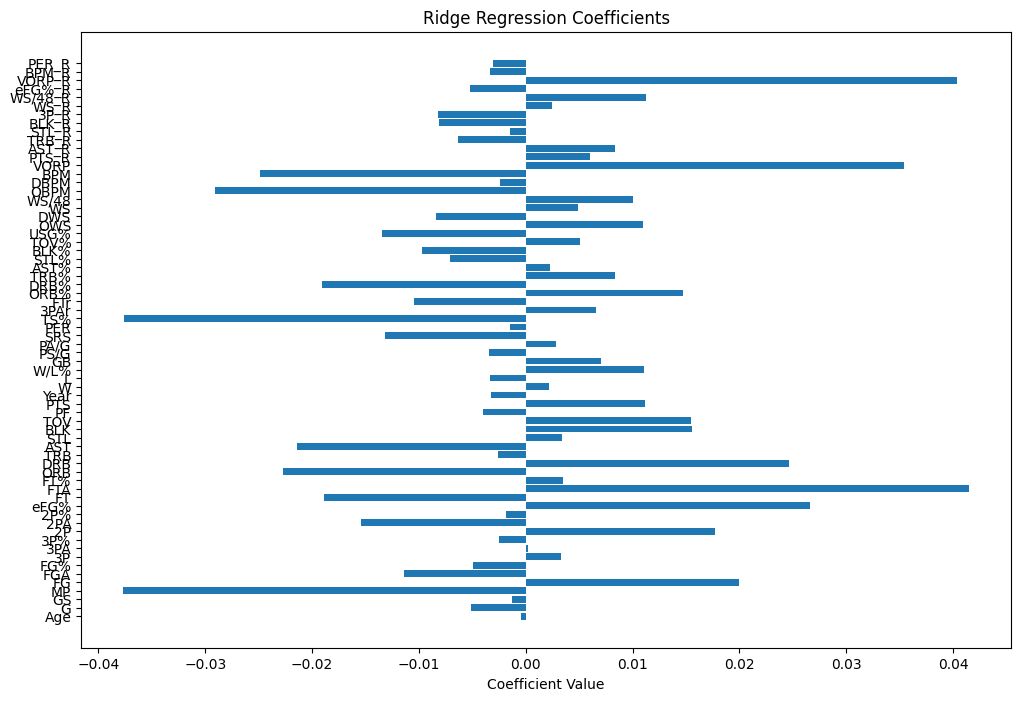

In [244]:
coefs = np.array(new_reg.coef_)
features = test_predictors
plt.figure(figsize=(12,8))
plt.barh(features, coefs)
plt.xlabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.show()


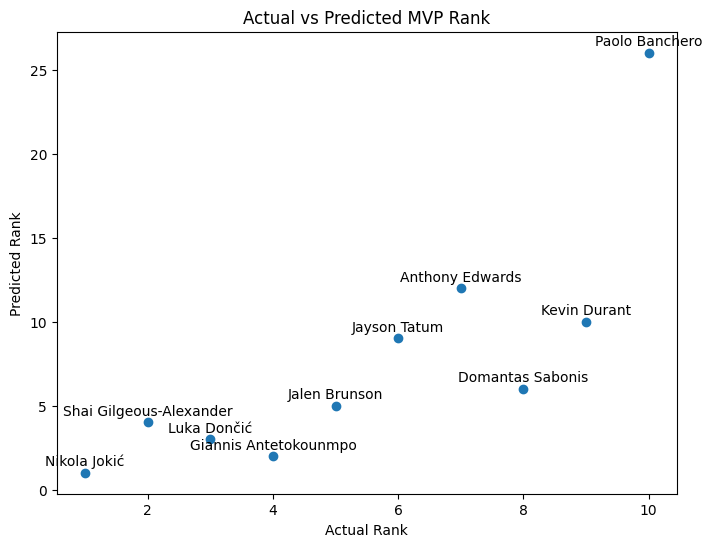

In [ ]:

top_ten = ranking.sort_values("Rk").head(10)

labels = top_ten['Player']

plt.figure(figsize=(8, 6))
plt.scatter(top_ten['Rk'], top_ten['Predicted_Rk'])

for i, player in enumerate(labels):
    plt.annotate(player, (top_ten['Rk'].iloc[i], top_ten['Predicted_Rk'].iloc[i]), 
                 textcoords="offset points", xytext=(0, 5), ha='center')
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.title('Actual vs Predicted MVP Rank')
plt.show()


In [269]:
test_predictors

['Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Year',
 'W',
 'L',
 'W/L%',
 'GB',
 'PS/G',
 'PA/G',
 'SRS',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'PTS_R',
 'AST_R',
 'TRB_R',
 'STL_R',
 'BLK_R',
 '3P_R',
 'WS_R',
 'WS/48_R',
 'eFG%_R',
 'VORP_R',
 'BPM_R',
 'PER_R']

In [277]:
test_test_predictors=[
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FTA',
 'FT%',
 'TRB',
 'AST',
 'PTS',
 'Year',
 'W',
 'L',
 'W/L%',
 'GB',
 'PS/G',
 'PA/G',
 'SRS',
 'PER',
 'TS%',
 'WS',
 'WS/48',
 'BPM',
 'VORP',
 'PTS_R',
 'AST_R',
 'WS_R',
 'WS/48_R',
 'eFG%_R',
 'VORP_R',
 'BPM_R',
 'PER_R']

In [278]:
test_test_predictors

['FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FTA',
 'FT%',
 'TRB',
 'AST',
 'PTS',
 'Year',
 'W',
 'L',
 'W/L%',
 'GB',
 'PS/G',
 'PA/G',
 'SRS',
 'PER',
 'TS%',
 'WS',
 'WS/48',
 'BPM',
 'VORP',
 'PTS_R',
 'AST_R',
 'WS_R',
 'WS/48_R',
 'eFG%_R',
 'VORP_R',
 'BPM_R',
 'PER_R']

In [289]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=500, random_state=15, min_samples_split=7,n_jobs=-1)
rf.fit(train[test_predictors],train['Share'])
preds=rf.predict(test[test_predictors])

In [292]:
preds=pd.DataFrame(preds,columns=['predictions'], index=test.index)
combo=pd.concat([test[["Player","Share"]], preds], axis=1)
ranking=add_ranks(combo)
ranking.sort_values("Rk").head(5)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
14541,Nikola Jokić,0.935,0.859574,1,1,0
15274,Shai Gilgeous-Alexander,0.646,0.689341,2,2,0
14485,Luka Dončić,0.572,0.493772,3,4,-1
15045,Giannis Antetokounmpo,0.194,0.559292,4,3,1
15204,Jalen Brunson,0.143,0.128329,5,7,-2


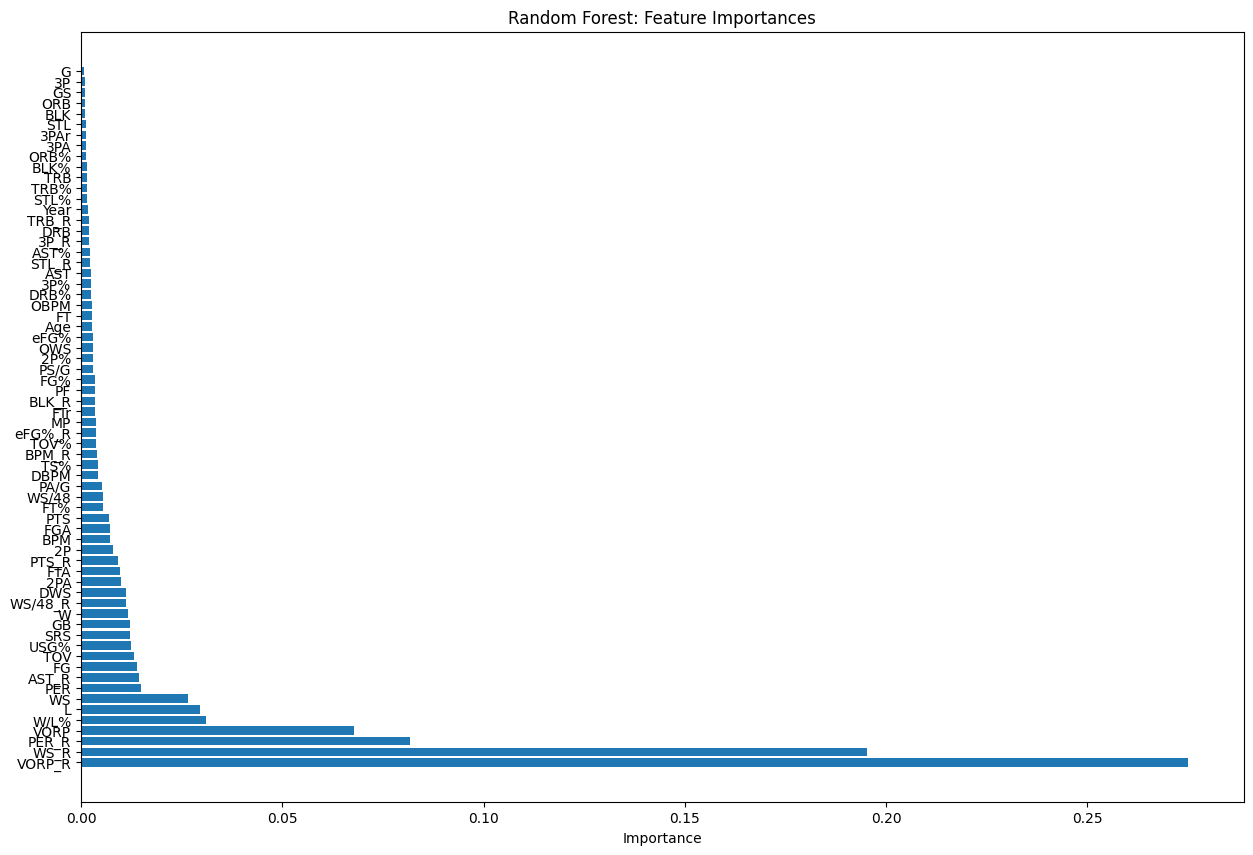

In [293]:
feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': test_predictors, 
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(15,10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest: Feature Importances')
plt.show()

In [ ]:
rf2=RandomForestRegressor(n_estimators=500, random_state=15, min_samples_split=7,n_jobs=-1)
rf2.fit(train[test_test_predictors],train['Share'])
preds2=rf2.predict(test[test_test_predictors])

In [302]:
preds2=pd.DataFrame(preds2,columns=['predictions'], index=test.index)
combo2=pd.concat([test[["Player","Share"]], preds2], axis=1)
ranking2=add_ranks(combo2)
ranking2.sort_values("Rk").head(5)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
14541,Nikola Jokić,0.935,0.859574,1,1,0
15274,Shai Gilgeous-Alexander,0.646,0.689341,2,2,0
14485,Luka Dončić,0.572,0.493772,3,4,-1
15045,Giannis Antetokounmpo,0.194,0.559292,4,3,1
15204,Jalen Brunson,0.143,0.128329,5,7,-2


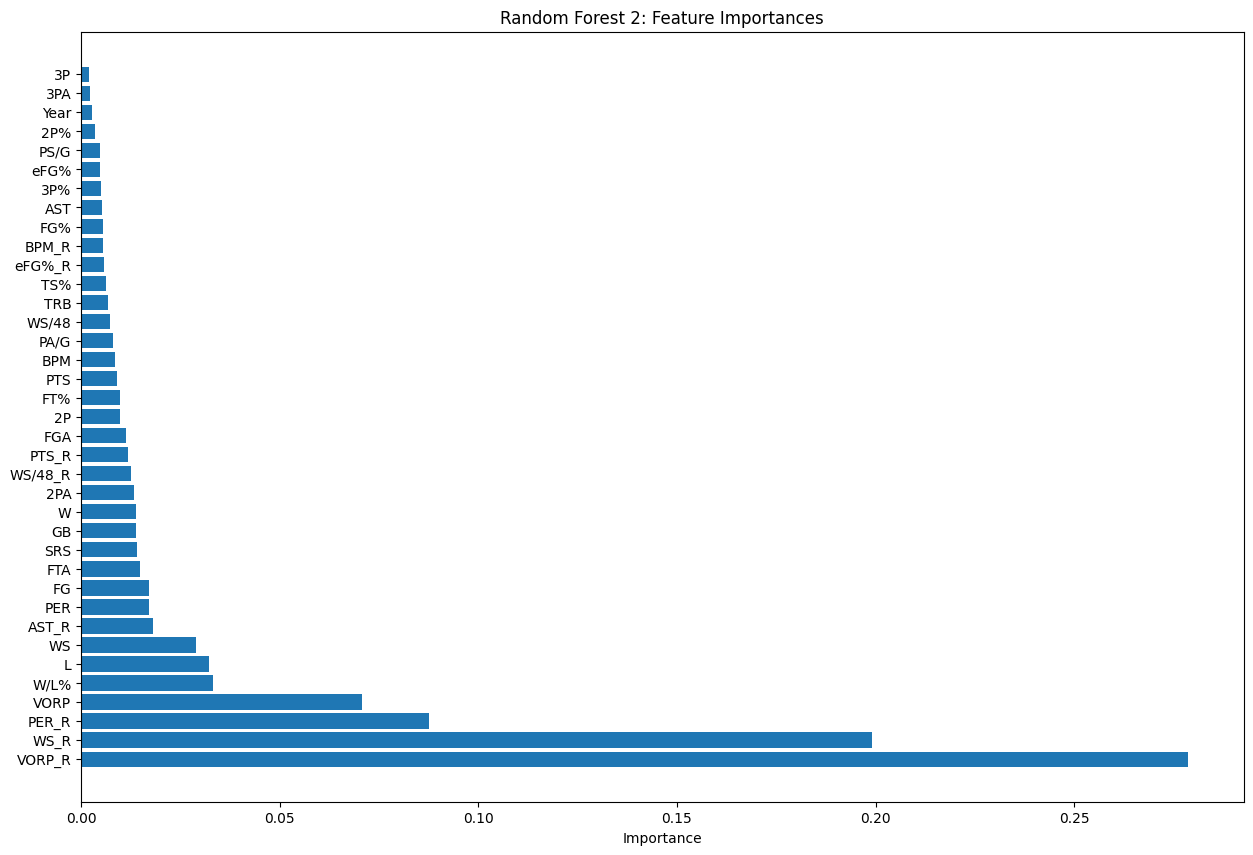

In [301]:
feature_importances = rf2.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': test_test_predictors, 
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(15,10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest 2: Feature Importances')
plt.show()

In [304]:
from sklearn.feature_selection import RFE

rf =RandomForestRegressor(n_estimators=500, random_state=15, min_samples_split=7,n_jobs=-1)  # You can use other models too
rfe = RFE(rf, n_features_to_select=40)  # Select top 5 features
fit = rfe.fit(train[test_predictors], train['Share'])

# Get selected features
selected_features = [f for f, s in zip(train[test_predictors].columns, fit.support_) if s]
print(selected_features)

['MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', 'FTA', 'FT%', 'TOV', 'PF', 'PTS', 'W', 'L', 'W/L%', 'GB', 'PA/G', 'SRS', 'PER', 'TS%', 'FTr', 'TOV%', 'USG%', 'DWS', 'WS', 'WS/48', 'DBPM', 'BPM', 'VORP', 'PTS_R', 'AST_R', 'TRB_R', 'STL_R', 'BLK_R', 'WS_R', 'WS/48_R', 'eFG%_R', 'VORP_R', 'BPM_R', 'PER_R']


In [317]:
rf3=RandomForestRegressor(n_estimators=500, random_state=27, min_samples_split=5,n_jobs=-1)
rf3.fit(train[selected_features],train['Share'])
preds3=rf3.predict(test[selected_features])

In [318]:
preds3=pd.DataFrame(preds3,columns=['predictions'], index=test.index)
combo3=pd.concat([test[["Player","Share"]], preds3], axis=1)
ranking3=add_ranks(combo3)
ranking3.sort_values("Rk").head(5)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
14541,Nikola Jokić,0.935,0.852590,1,1,0
15274,Shai Gilgeous-Alexander,0.646,0.706368,2,2,0
14485,Luka Dončić,0.572,0.527480,3,4,-1
15045,Giannis Antetokounmpo,0.194,0.571663,4,3,1
15204,Jalen Brunson,0.143,0.128533,5,6,-1


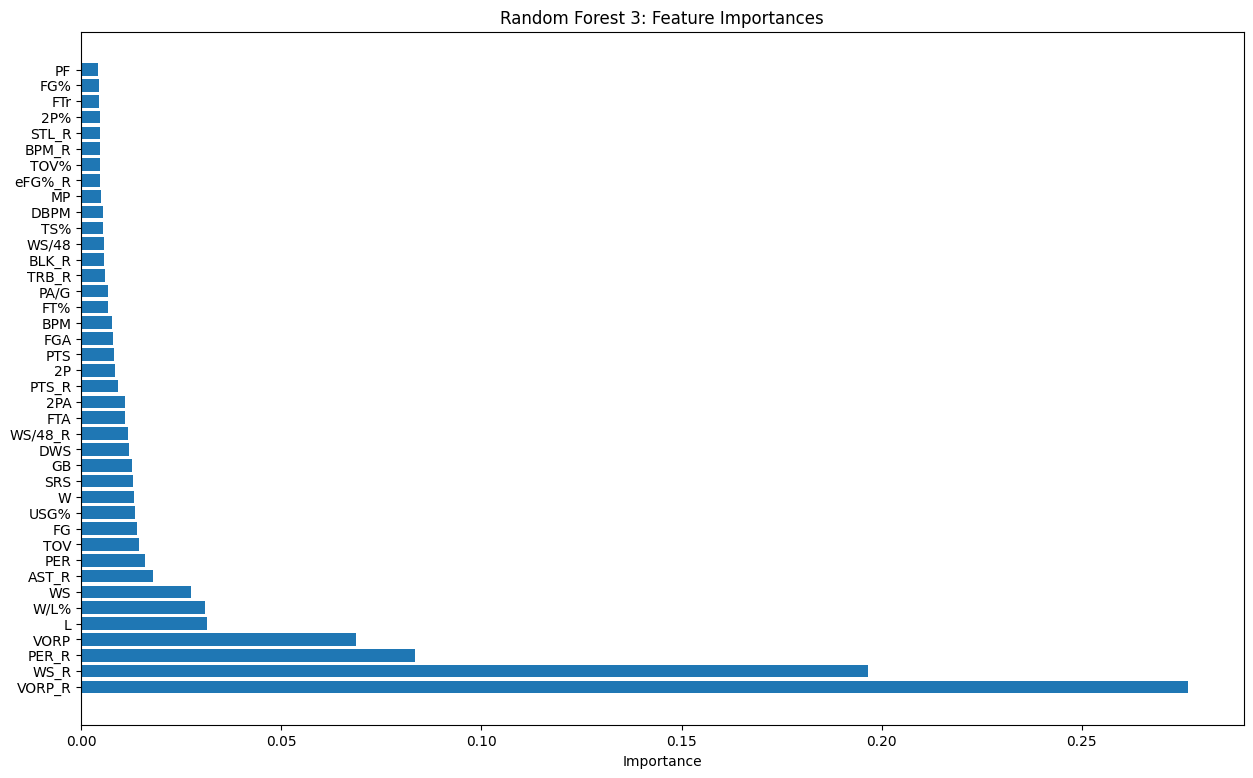

In [309]:
feature_importances = rf3.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': selected_features, 
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(15,9))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest 3: Feature Importances')
plt.show()

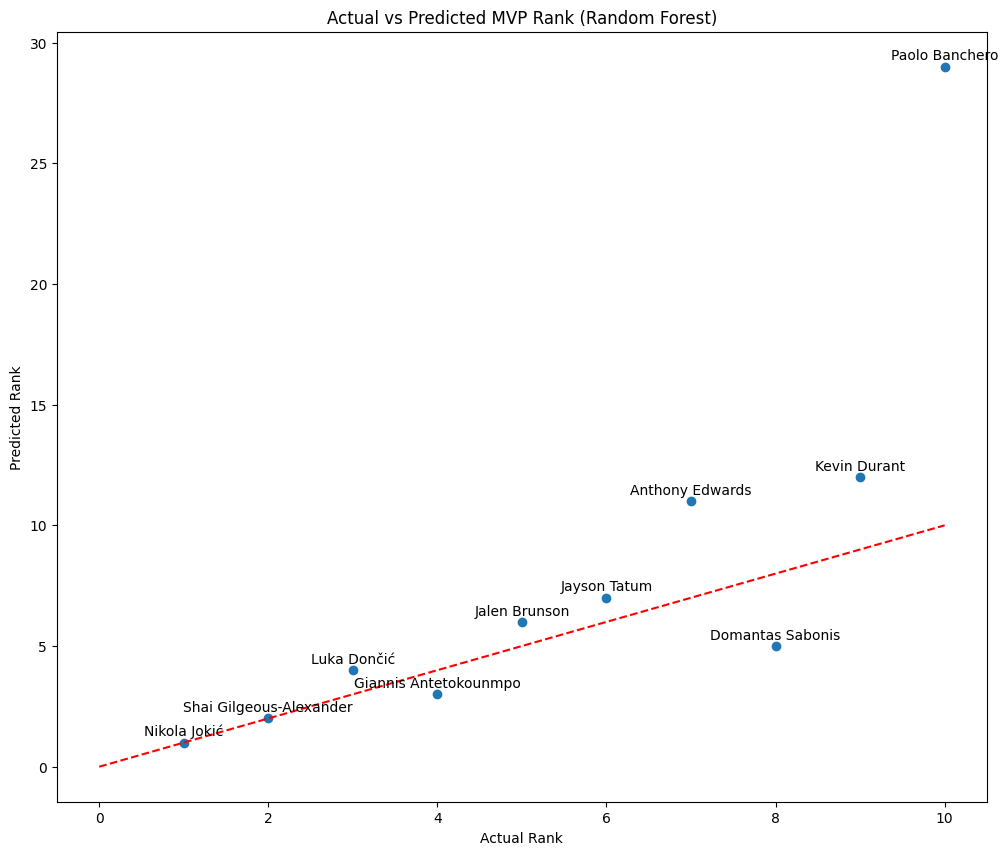

In [324]:
top_ten_rf = ranking3.sort_values("Rk").head(10)

labels = top_ten['Player']

plt.figure(figsize=(12, 10))
plt.scatter(top_ten_rf['Rk'], top_ten_rf['Predicted_Rk'])

for i, player in enumerate(labels):
    plt.annotate(player, (top_ten_rf['Rk'].iloc[i], top_ten_rf['Predicted_Rk'].iloc[i]), 
                 textcoords="offset points", xytext=(0, 5), ha='center')
x = range(0,11)  # Generate x values
plt.plot(x, x, color='red', linestyle='--', label='y = x')  # Line with slope 1

plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.title('Actual vs Predicted MVP Rank (Random Forest)')
plt.show()